In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [8]:
newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))
tokenizer = RegexpTokenizer(r'\w+')
# vectorizer = TfidfVectorizer(lowercase=True,
#                         stop_words='english',
#                         ngram_range = (1,1),
#                         tokenizer = tokenizer.tokenize)
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)

In [46]:
newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'))
vectors_test = vectorizer.transform(newsgroups_test.data)

In [55]:
# lda = LatentDirichletAllocation(n_components=20, random_state=1,learning_decay=0.5,learning_method="online",max_iter=100)
# lda.fit(vectors)

In [56]:
# print(lda.n_feature_in)

In [59]:
doc_topic_dist_unnormalized = np.matrix(lda.transform(vectors_test))
labes=doc_topic_dist_unnormalized.argmax(axis=1)

In [76]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


In [60]:
print(len(labes))
print(len(newsgroups_test.target))
m=0;
for i in range(len(labes)):
    if(labes[i][0]!=newsgroups_test.target[i]):
        m+=1
acc=(len(labes)-m)/len(labes)
print(m)
print(acc*100)

7532
7532
7171
4.7928836962294215


In [47]:
num_components=8

# Create LDA object
model=LatentDirichletAllocation(n_components=num_components, random_state=1)

# Fit and Transform SVD model on data
lda_matrix = model.fit_transform(vectors)

# Get Components 
lda_components=model.components_
# predict topics for test data
# unnormalized doc-topic distribution
#X_test = tf_vectorizer.transform(test)


In [60]:
# doc_topic_dist_unnormalized = np.matrix(model.transform(vectors_test))

# normalize the distribution (only needed if you want to work with the probabilities)
# doc_topic_dist = doc_topic_dist_unnormalized/doc_topic_dist_unnormalized.sum(axis=1)
# print(doc_topic_dist)
# print(doc_topic_dist.argmax(axis=1))

In [41]:
terms = vectorizer.get_feature_names()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['oracle', 'bmug', 'ebosco', 'mancus', 'caldwell', 'sq', 'opel']
Topic 1:  ['the', 'to', 'of', 'and', 'in', 'is', 'that']
Topic 2:  ['jr0930', 'workspace', '02106', 'indyvax', 'xopendisplay', 'iupui', 'hismanal']
Topic 3:  ['ax', 'keller', 'angmar', 'cosmo', 'kkeller', 'journalism', 'gsh7w']
Topic 4:  ['catbyte', 'dtmedin', 'b30', 'mbeaving', 'lib', 'irwin', 'medin']
Topic 5:  ['egalon', 'ssc', 'claudio', 'oliveira', 'traven', 'telix', 'pollux']
Topic 6:  ['hiram', 'ashok', 'mayhew', 'wtm', 'bgardner', 'blaine', 'neoucom']
Topic 7:  ['msg', 'dyer', 'spdcc', 'rauser', 'petch', 'candida', 'jagr']


In [9]:
# Define Search Param
search_params = {'n_components': [10,15], 'learning_decay': [.5, 0.7]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(vectors)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7],
                         'n_components': [10, 15]})

In [58]:
# GridSearchCV(cv=None, error_score='raise',
#        estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
#              evaluate_every=-1, learning_decay=0.7, learning_method=None,
#              learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
#              mean_change_tol=0.001, n_components=10, n_jobs=1,
#              n_topics=None, perp_tol=0.1, random_state=None,
#              topic_word_prior=None, total_samples=1000000.0, verbose=0),
#        fit_params=None, iid=True, n_jobs=1,
#        param_grid={'n_components': [10, 15], 'learning_decay': [0.5, 0.7]},
#        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#        scoring=None, verbose=0)

In [17]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(vectors))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -279523.1993188141
Model Perplexity:  164796.7235914736


In [57]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15]
# log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.params['learning_decay']==0.5]
# log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.params['learning_decay']==0.7]
# log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.parameters['learning_decay']==0.9]

# Show graph
# plt.figure(figsize=(12, 8))
# plt.plot(n_topics, log_likelyhoods_5, label='0.5')
# plt.plot(n_topics, log_likelyhoods_7, label='0.7')
# plt.plot(n_topics, log_likelyhoods_9, label='0.9')
# plt.title("Choosing Optimal LDA Model")
# plt.xlabel("Num Topics")
# plt.ylabel("Log Likelyhood Scores")
# plt.legend(title='Learning decay', loc='best')
# plt.show()

In [32]:
print(model.cv_results_.items)
for key,value in model.cv_results_.items():
    print(key)
    print(value)

<built-in method items of dict object at 0x000001313C999C80>
mean_fit_time
[25.21519012 35.84408865]
std_fit_time
[1.94332899 6.52504797]
mean_score_time
[0.64138322 0.72031679]
std_score_time
[0.0497628  0.05762157]
param_learning_decay
[0.5 0.7]
param_n_components
[10 10]
params
[{'learning_decay': 0.5, 'n_components': 10}, {'learning_decay': 0.7, 'n_components': 10}]
split0_test_score
[-277191.36350667 -281188.46045791]
split1_test_score
[-282605.21560971 -282148.74133555]
split2_test_score
[-285259.32954121 -284621.59664876]
split3_test_score
[-276988.569942   -279659.23248665]
split4_test_score
[-275571.51799449 -286416.95405876]
mean_test_score
[-279523.19931881 -282806.99699753]
std_test_score
[3738.43828268 2420.1629838 ]
rank_test_score
[1 2]


In [12]:
from pprint import pprint
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [9]:
newsgroups_train.data[3]

'From: jgreen@amber (Joe Green)\nSubject: Re: Weitek P9000 ?\nOrganization: Harris Computer Systems Division\nLines: 14\nDistribution: world\nNNTP-Posting-Host: amber.ssd.csd.harris.com\nX-Newsreader: TIN [version 1.1 PL9]\n\nRobert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:\n> > Anyone know about the Weitek P9000 graphics chip?\n> As far as the low-level stuff goes, it looks pretty nice.  It\'s got this\n> quadrilateral fill command that requires just the four points.\n\nDo you have Weitek\'s address/phone number?  I\'d like to get some information\nabout this chip.\n\n--\nJoe Green\t\t\t\tHarris Corporation\njgreen@csd.harris.com\t\t\tComputer Systems Division\n"The only thing that really scares me is a person with no sense of humor."\n\t\t\t\t\t\t-- Jonathan Winters\n'

In [10]:
import numpy as np
import math
# loading the train dataset from csv skiping the first row(label)
data = np.loadtxt('MNIST_train.csv',comments='#',delimiter=',',skiprows=1)
x = int(len(data)*.8) # spliting the data into 80% and 20% for traing and vallidation
# validation data will be used for finding the optimal value k in KNN
np.random.shuffle(data)
train_data=data[:x,:] # training_data
validation_data=data[x:,:]
# loading the test dataset from csv skiping the first row(label)
test_data = np.loadtxt('MNIST_test.csv',comments='#',delimiter=',',skiprows=1)
len(train_data)

759

In [11]:
math.sqrt(759)

27.54995462791182

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
import numpy as np

# grab a sample data set
dataset = fetch_20newsgroups(shuffle=True)
train,test = dataset.data[:500], dataset.data[-3:]

# vectorizer the features
tf_vectorizer = TfidfVectorizer()
X_train = tf_vectorizer.fit_transform(train)

# train the model
lda = LatentDirichletAllocation(n_components=20,random_state=1,learning_decay=0.7,learning_method="online",max_iter=5,learning_offset=4)
lda.fit(X_train)

# predict topics for test data
# unnormalized doc-topic distribution
X_test = tf_vectorizer.transform(test)
doc_topic_dist_unnormalized = np.matrix(lda.transform(X_test))

# normalize the distribution (only needed if you want to work with the probabilities)
doc_topic_dist = doc_topic_dist_unnormalized/doc_topic_dist_unnormalized.sum(axis=1)

In [100]:
labes=doc_topic_dist_unnormalized.argmax(axis=1)
y=dataset.target[-3:]
print(doc_topic_dist_unnormalized)
print(labes)
print(y)
m=0;
for i in range(len(labes)):
    if(labes[i][0]!=y[i]):
        m+=1
print(m)

[[0.00763301 0.85497282 0.00763301 0.00763301 0.00763301 0.00763301
  0.00763301 0.00763301 0.00763301 0.00763301 0.00763301 0.00763301
  0.00763301 0.00763301 0.00763301 0.00763301 0.00763301 0.00763301
  0.00763301 0.00763301]
 [0.00533394 0.89865521 0.00533394 0.00533394 0.00533394 0.00533394
  0.00533394 0.00533394 0.00533394 0.00533394 0.00533394 0.00533394
  0.00533394 0.00533394 0.00533394 0.00533394 0.00533394 0.00533394
  0.00533394 0.00533394]
 [0.00694929 0.8679635  0.00694929 0.00694929 0.00694929 0.00694929
  0.00694929 0.00694929 0.00694929 0.00694929 0.00694929 0.00694929
  0.00694929 0.00694929 0.00694929 0.00694929 0.00694929 0.00694929
  0.00694929 0.00694929]]
[[1]
 [1]
 [1]]
[3 1 8]
2


In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(topic.argsort()[:-no_top_words - 1:-1])
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
[670 432 853 259 773 433 272 855 527 692]
people gun state control right guns crime states law police
Topic 1:
[900 734 171 996 303 540 321 845 108 508]
time question book years did like don space answer just
Topic 2:
[612 543 778 795 857 902 275 293 487 997]
mr line rules science stephanopoulos title current define int yes
Topic 3:
[509 214 511 231 340 636 296 100 931 164]
key chip keys clipper encryption number des algorithm use bit
Topic 4:
[336 235 274 951 952 278 569 922  18 808]
edu com cs vs w7 cx mail uk 17 send
Topic 5:
[931 318 972 716 961 932 690 307 199 940]
use does window problem way used point different case value
Topic 6:
[973 893 516 451 286 318 322 716 540 938]
windows thanks know help db does dos problem like using
Topic 7:
[163 960 337 775 297 589 317 661 540 919]
bike water effect road design media dod paper like turn
Topic 8:
[321 508 540 897 516 670 421 944 420 790]
don just like think know people good ve going say
Topic 9:
[193 625 710 421 703 932  98 7

In [47]:
model= GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method="online",
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
            perp_tol=0.1, random_state=2,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
      n_jobs=1,
       param_grid={'n_components': [5,10,15,20], 'learning_decay': [0.5, 0.7,0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
model.fit(X_train)

GridSearchCV(error_score='raise',
             estimator=LatentDirichletAllocation(learning_method='online',
                                                 n_jobs=1, random_state=2),
             n_jobs=1,
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 10, 15, 20]},
             return_train_score='warn')

In [50]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(X_train))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 5}
Best Log Likelihood Score:  -5418.8507513837
Model Perplexity:  63420.42479093151


In [51]:
#print(model.cv_results_)
#print(len(model.cv_results_['mean_train_score']))
l5=[]
l7=[]
l9=[]
for i in range(len(model.cv_results_['params'])):
    if(model.cv_results_['params'][i]['learning_decay']==0.5):
            l5.append(round(model.cv_results_['mean_train_score'][i]))
    elif(model.cv_results_['params'][i]['learning_decay']==0.7):
            l7.append(round(model.cv_results_['mean_train_score'][i]))
    elif(model.cv_results_['params'][i]['learning_decay']==0.9):
            l9.append(round(model.cv_results_['mean_train_score'][i]))

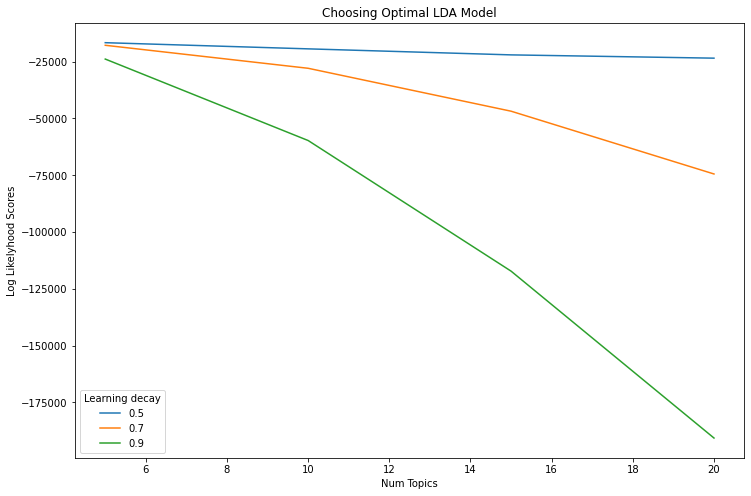

In [54]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [5,10, 15,20]
# log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.params['learning_decay']==0.5]
# log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.params['learning_decay']==0.7]
# log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, l5, label='0.5')
plt.plot(n_topics, l7, label='0.7')
plt.plot(n_topics, l9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()